In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Himanshu\scikit_learn_data


In [4]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
oliv.data.shape

(400, 4096)

In [7]:
oliv.images.shape

(400, 64, 64)

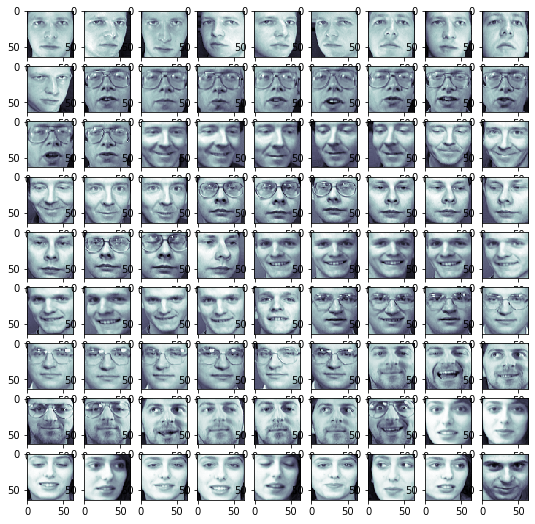

In [9]:
fig = plt.figure(figsize = (9,9))
for i in range(81):
    ax = fig.add_subplot(9,9,i+1)
    ax.imshow(oliv.images[i],cmap = plt.cm.bone)
    
plt.show()

In [25]:
x = oliv.data
y = oliv.target

In [26]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
pca.components_.shape

(400, 4096)

In [38]:
k = 0
total = sum(pca.explained_variance_)
currentinfo = 0

while currentinfo/total<0.99999:
    currentinfo += pca.explained_variance_[k]
    k += 1
    
k

395

In [39]:
pca = PCA(n_components = k)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 395)

In [40]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [41]:
x_approx_images = x_approx.reshape((400,64,64))

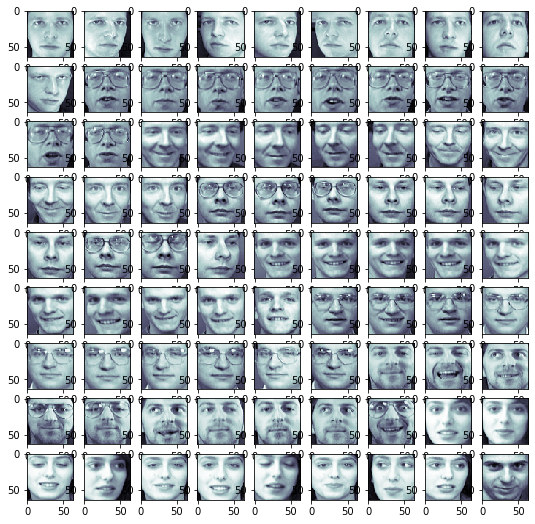

In [42]:
fig = plt.figure(figsize = (9,9))
for i in range(81):
    ax = fig.add_subplot(9,9,i+1)
    ax.imshow(x_approx_images[i],cmap = plt.cm.bone)
    
plt.show()

In [43]:
eigenval = pca.components_
eigenval.shape

(395, 4096)

In [44]:
eigenfaces = eigenval.reshape((395,64,64))

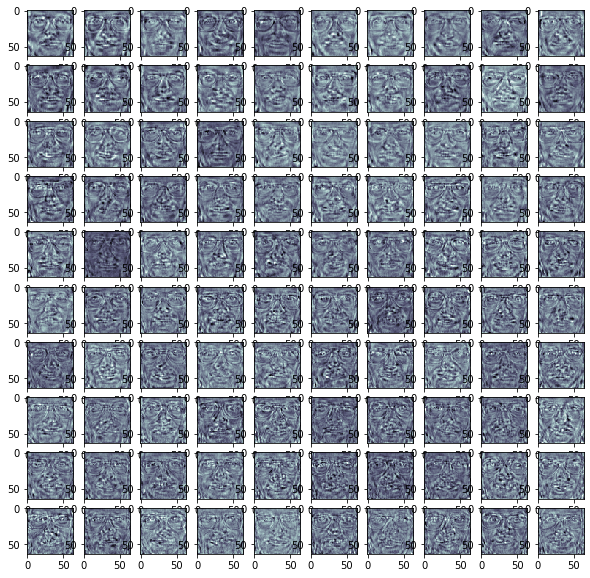

In [53]:
fig = plt.figure(figsize = (10,10))
for i in range(100):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(eigenfaces[i+81],cmap = plt.cm.bone)
    
plt.show()

In [46]:
len(eigenfaces)

395